In [1]:
# Requires Inkscape installed in "/Applications/Inkscape.app/Contents/Resources/bin/inkscape"
import os
import svgwrite
from IPython.display import SVG, display_svg

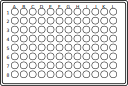

In [2]:
# Configuration & constants
# -------------------------
n_rows = 8
n_cols = 12
plate_width = 127.66  # mm, includes the two borders
plate_height = 85.48  # mm, includes the two borders
barrier_width = 0.5  # mm
well_diameter = 7  # mm, does not include the barrier
well_separation = 9  # mm, from center to center

margin = 0.5  # mm, space between the external border and the end of the figure
borders_width = 0.8  # mm, thickness of the two borders lines
borders_space = 1  # mm, empty space between the two borders lines
borders_radius = 2  # mm, radius of the borders corner


# Inferring other measures
# ------------------------

# Figure size
viewport_width = plate_width + 2 * margin
viewport_height = plate_height + 2 * margin

# Well diameter including barrier
well_barrier_diameter =  2 * barrier_width + well_diameter

# Space between well barrier and the external border
padding_width = (plate_width - (n_cols - 1) * well_separation - well_barrier_diameter) / 2.0
padding_height = (plate_height - (n_rows - 1) * well_separation - well_barrier_diameter) / 2.0

# Coordinates of the top left well center
first_x = margin + padding_width + barrier_width + well_diameter / 2.0
first_y = margin + padding_height + barrier_width + well_diameter / 2.0


# Draw plate
# ----------
size = (str(viewport_width) + 'mm', str(viewport_height) + 'mm')
svg_document = svgwrite.Drawing(filename='plate' + str(n_cols * n_rows) + '.svg', size=size)

# Modify ViewBox so that each user unit is equal to 1mm
# http://sarasoueidan.com/blog/svg-coordinate-systems/
# http://stackoverflow.com/questions/13006601/setting-default-units-in-svg-python-svgwrite
svg_document.viewbox(width=viewport_width, height=viewport_height)


svg_document.add(svg_document.rect(insert = (margin, margin),
                                   size = (plate_width, plate_height),
                                   rx = borders_radius,
                                   stroke_width = borders_width,
                                   stroke = "black",
                                   fill = "rgb(255,255,255)"
                                  ))

bord_marg = borders_width + borders_space
svg_document.add(svg_document.rect(insert = (margin + bord_marg, margin + bord_marg),
                                   size = (plate_width - 2 * bord_marg, plate_height - 2 * bord_marg),
                                   stroke_width = borders_width,
                                   rx = borders_radius,
                                   stroke = "black",
                                   fill = "rgb(255,255,255)"
                                  ))
        
for row in range(n_rows):
    svg_document.add(svg_document.text(text = str(row + 1),      
                                       insert = (-0.75 * well_separation + first_x,
                                                 row * well_separation + first_y + 1),
                                       text_anchor = 'middle',
                                       font_size = 4.5,
                                       alignment_baseline = 'middle',
                                       font_family = 'Futura'
                                      ))

for col in range(n_cols):
    svg_document.add(svg_document.text(text = chr(col + 65),      
                                       insert = (col * well_separation + first_x,
                                                 -0.55 * well_separation + first_y),
                                       text_anchor = 'middle',
                                       font_size = 4.5,
                                       alignment_baseline = 'middle',
                                       font_family = 'Futura'
                                       ))

for row in range(n_rows):
    for col in range(n_cols):
        svg_document.add(svg_document.circle(center = (first_x + col * well_separation, first_y + row * well_separation),
                                             r = well_diameter / 2.0,
                                             stroke_width = barrier_width,
                                             stroke = "black",
                                             fill = "rgb(255,255,255)"                                             
                                            ))

        
# svg_document.stretch()
display_svg(SVG(svg_document.tostring()))

In [3]:
def to_pdf_inkscape(svg, filename):
    """Save SVG and convert it to PDF with Inkscape on Mac OS X."""
    svg.save()
    inkscape_path = "/Applications/Inkscape.app/Contents/Resources/bin/inkscape"
    svg_path = os.path.abspath(svg_document.filename)
    pdf_path = os.path.abspath(filename)
    os.system(inkscape_path + ' -f ' + svg_path + ' -A ' + pdf_path)

In [4]:
to_pdf_inkscape(svg_document, 'plate' + str(n_cols * n_rows) + '.pdf')